In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_predict

from sklearn.metrics import confusion_matrix
from sklearn import metrics

from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier

%matplotlib inline

In [2]:
def plot_matrizconfusao(y_true, y_pred, titulo, figsize=(6,6)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Atual'
    cm.columns.name = 'Predição'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "Blues", annot=annot, fmt='', ax=ax)
    plt.title(titulo)

In [3]:
classifiers = [
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SGD Classifier", SGDClassifier(loss='log', random_state=42)),
    ("SVC", SVC(probability=True, random_state=42)),
    ("XGB",XGBClassifier(random_state=42))
]

# Dataset

In [4]:
df = pd.read_csv('dataset_18bps.csv', sep=',')
df

,bps1,bps2,bps3,bps4,bps5,bps6,bps7,bps8,bps9,bps10,bps11,bps12,bps13,bps14,bps15,bps16,bps17,bps18,Target
0,-2.27,-2.24,-1.44,-0.58,-1.00,-1.00,-1.00,-1.30,-1.44,-0.58,-0.88,-1.44,-1.30,-1.45,-2.24,-1.84,-1.44,-0.58,0
1,-1.84,-1.28,-0.58,-1.30,-1.44,-0.58,-1.30,-1.44,-1.28,-1.84,-2.24,-1.30,-1.00,-0.88,-1.00,-1.00,-1.44,-1.44,0
2,-1.30,-1.30,-1.30,-1.30,-1.00,-1.45,-1.45,-0.88,-1.44,-2.27,-1.28,-1.44,-1.84,-1.84,-2.27,-1.84,-1.84,-1.45,0
3,-1.84,-1.84,-1.28,-0.58,-1.45,-1.84,-1.28,-0.58,-1.30,-2.27,-1.28,-1.44,-2.27,-1.28,-0.58,-1.00,-1.30,-1.30,0
4,-1.28,-1.84,-2.24,-1.30,-1.45,-1.45,-1.30,-1.84,-1.30,-1.00,-1.30,-1.84,-2.27,-1.45,-0.88,-1.44,-1.84,-1.30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-1.28,-1.45,-0.88,-0.58,-1.00,-1.00,-1.00,-0.88,-1.00,-0.58,-0.88,-1.00,-0.58,-0.88,-0.58,-1.00,-0.88,-1.44,1
344,-1.30,-0.88,-1.00,-1.00,-1.00,-0.58,-1.00,-0.88,-1.00,-0.58,-0.88,-1.00,-0.58,-1.30,-1.44,-0.58,-1.30,-1.84,1
345,-1.45,-0.88,-1.44,-1.44,-1.00,-0.58,-0.88,-0.58,-1.00,-0.88,-0.58,-0.88,-0.58,-1.00,-1.45,-1.45,-1.00,-1.00,1
346,-1.30,-0.88,-1.44,-1.44,-1.00,-0.58,-1.45,-1.45,-0.88,-1.00,-0.58,-0.88,-0.58,-1.00,-1.45,-1.45,-0.88,-0.58,1


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Metrics for {name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    cv_results = cross_validate(classifier, X, y, cv=10, return_train_score=False, return_estimator=True)
    cv_scores = cv_results['test_score']
    print(f"Cross-Validation Mean Accuracy: {cv_scores.mean():.2f}")
    print("Cross-Validation Scores for each fold:")
    for fold, score in enumerate(cv_scores, 1):
        print(f"Fold {fold}: {score:.2f}")
    print()

Metrics for AdaBoost:
Accuracy: 0.79
Precision: 0.72
Recall: 0.79
F1 Score: 0.75
Cross-Validation Mean Accuracy: 0.81
Cross-Validation Scores for each fold:
Fold 1: 0.71
Fold 2: 0.66
Fold 3: 0.80
Fold 4: 0.69
Fold 5: 0.89
Fold 6: 0.89
Fold 7: 0.83
Fold 8: 0.86
Fold 9: 0.88
Fold 10: 0.91

Metrics for Decision Tree:
Accuracy: 0.77
Precision: 0.69
Recall: 0.83
F1 Score: 0.75
Cross-Validation Mean Accuracy: 0.77
Cross-Validation Scores for each fold:
Fold 1: 0.69
Fold 2: 0.63
Fold 3: 0.86
Fold 4: 0.66
Fold 5: 0.80
Fold 6: 0.69
Fold 7: 0.77
Fold 8: 0.86
Fold 9: 0.82
Fold 10: 0.97

Metrics for Gradient Boosting:
Accuracy: 0.80
Precision: 0.73
Recall: 0.83
F1 Score: 0.77
Cross-Validation Mean Accuracy: 0.82
Cross-Validation Scores for each fold:
Fold 1: 0.74
Fold 2: 0.66
Fold 3: 0.83
Fold 4: 0.71
Fold 5: 0.86
Fold 6: 0.94
Fold 7: 0.83
Fold 8: 0.91
Fold 9: 0.82
Fold 10: 0.91

Metrics for Random Forest:
Accuracy: 0.81
Precision: 0.77
Recall: 0.79
F1 Score: 0.78
Cross-Validation Mean Accuracy: 0

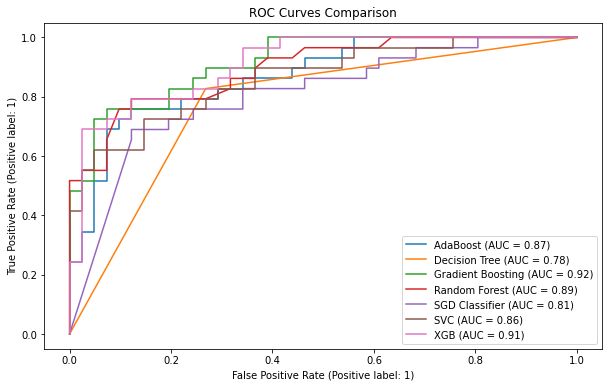

In [7]:
plt.figure(figsize=(10, 6))

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict_proba(X_test)[:, 1]  
    
    plot_roc_curve(classifier, X_test, y_test, ax=plt.gca(), name=name)

plt.title("ROC Curves Comparison")
plt.legend(loc='lower right')
plt.show()